# The following python code is testing to understand Support Control Vectors.
# Sources of informaation used:
- 1. Code example - https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

# Need to add f1 score and the rest of the scoring variables.

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

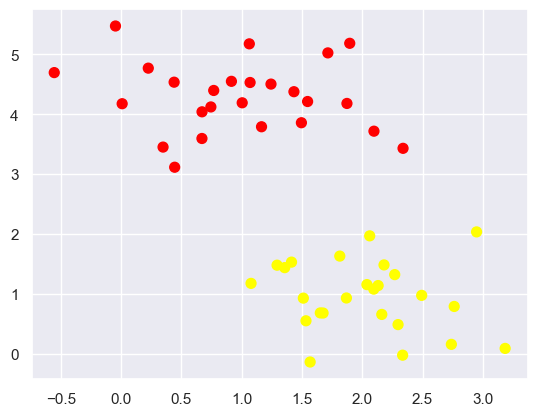

In [52]:
from sklearn.datasets import make_blobs # generates a dataset of two clusters
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

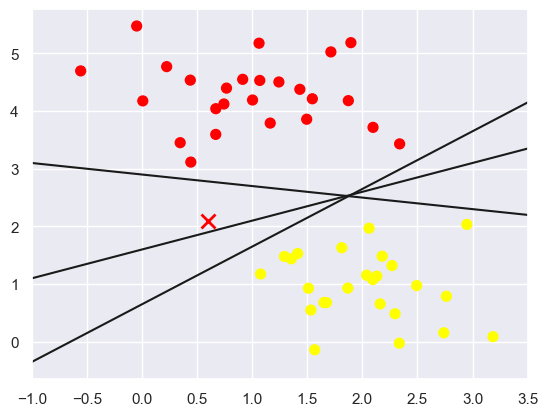

In [53]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

In [68]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [55]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

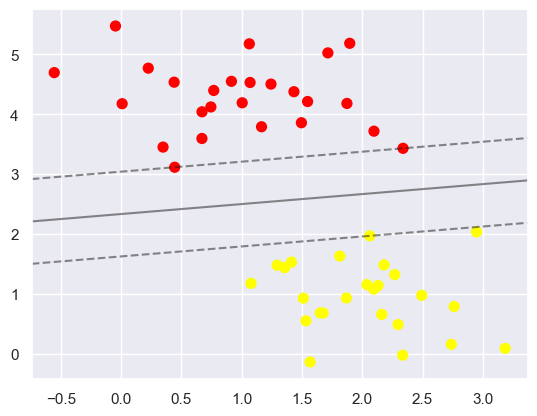

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [57]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

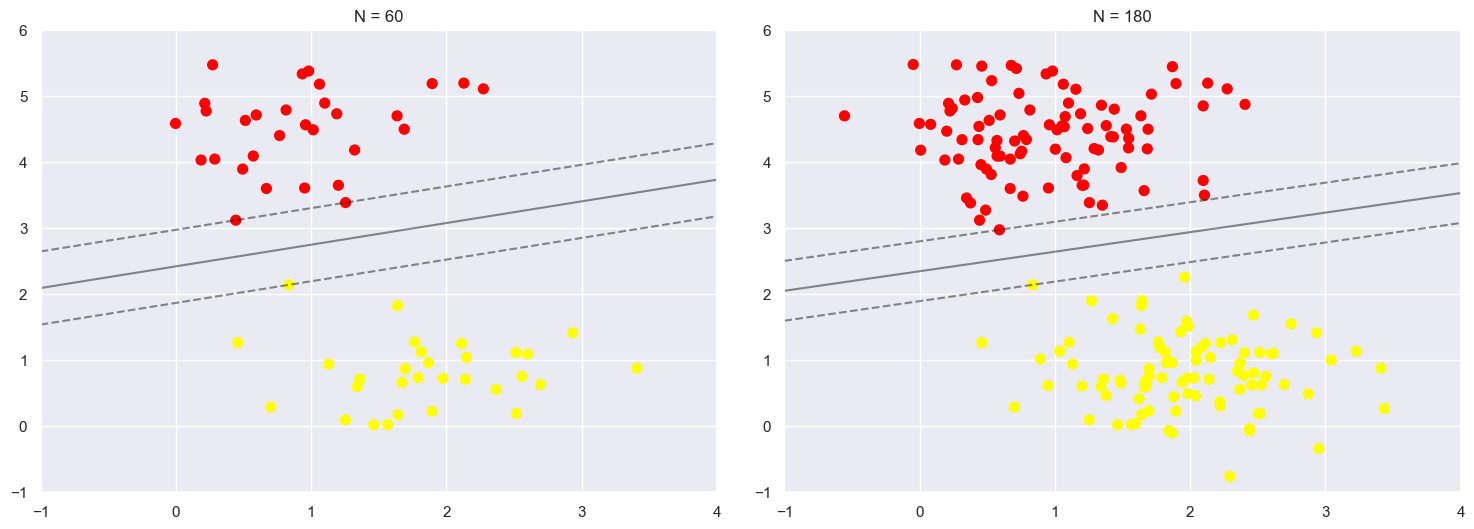

In [58]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 180]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

# iris dataset model


In [59]:
import matplotlib.pyplot as plt # Import which allows for Scatter plots to be implemented and used
from sklearn.datasets import load_iris # Built in dataset that is also located here "https://archive.ics.uci.edu/dataset/53/iris"
from sklearn.svm import SVC # Support Vector Classifier, used to train the model
from sklearn.metrics import confusion_matrix # Imports Confusion Matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

In [60]:
iris = load_iris() # Loads the dataset
# The roles, Feature role and Target role
X = iris.data[:, :2 ]  # This uses just two out of the 5 features, these current features are the [sepal length] and [sepal width]
y = iris.target  # There are 3 Targets [Iris Setosa, Iris Versicolour and Iris Virginica]. This code Targets all of them.

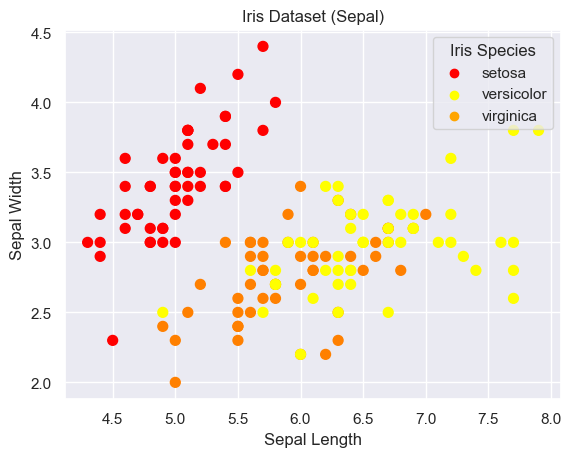

In [61]:
# Creating the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Sepal)')

# Create a legend for the scatter plot
for species, color in zip(iris.target_names, ['red', 'yellow', 'orange']):
    plt.scatter([], [], c=color, label=species)
plt.legend(loc='upper right', title='Iris Species')
plt.show()

In [62]:
# Training the model
model = SVC(kernel='linear') # Creates the SVM classifier which uses a Linear kernel
model.fit(X, y) # Training the model based off of X [target] and Y [Features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


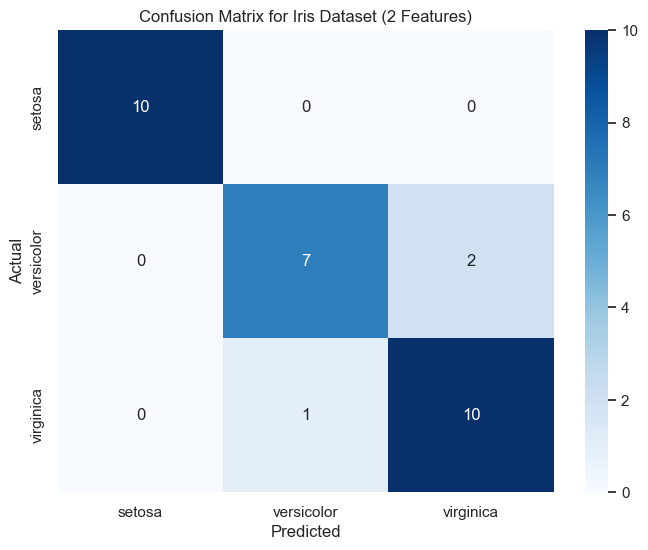

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Iris Dataset (2 Features)')
plt.show()

In [65]:
def predict_iris_type():
    print("Enter the sepal length and sepal width of the iris flower:")
    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width = float(input("Sepal Width (cm): "))
    user_input = np.array([[sepal_length, sepal_width]])

    prediction = model.predict(user_input)

    iris_species = iris.target_names[prediction][0]

    print(f"\nThe predicted iris species is: {iris_species}")

In [66]:
predict_iris_type()

Enter the sepal length and sepal width of the iris flower:

The predicted iris species is: setosa
